In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 1. Define input array X with angles from 60 deg to 300 deg converted in radians.
X = np.arange(60, 300, 1)
X = np.radians(X)
# 240 values are stored form 60 to 300 each.


In [4]:
# 2. Compute Y as Y=Sin(X)+K
# where K is a random number generated from normal distribution with zero mean and 0.15 std dev.
from sklearn.metrics import mean_squared_error
K = np.random.normal(0, 0.15, X.shape)
Y = np.sin(X) + K
# Y value is generated using normal distribution with mean 0 and standard deviation 0.15


In [5]:

# 3. Create Linear Regression model, and different Non-Linear Regression models of 3,6,9,12 and 15th degree polynomial
# on data created in step-1 and step-2.
# Linear Regression Model of 3,6,9,12 and 15th degree polynomial
def linear_regression(X, Y, rate, iter):
    # Initialize the parameters
    a = 0
    b = 0
    leng = len(X)
    # Performing Gradient Descent
    for i in range(iter):
        Y_pred = a * X + b
        D_a = (-2 / leng) * sum(X * (Y - Y_pred))
        D_b = (-2 / leng) * sum(Y - Y_pred)
        a = a - rate * D_a
        b = b - rate * D_b
    return a, b
    # Optimized the model using Gradient Descent

In [6]:
# Non Linear Regression Model of 3,6,9,12 and 15th degree polynomial
from sklearn.preprocessing import PolynomialFeatures
def non_linear_regression(X, Y, rate, iter, deg):
    # Initialize the parameters
    leng = len(X)
    t = np.zeros((deg + 1, 1))
    # Performing Gradient Descent
    for i in range(iter):
        Y_pred = np.zeros((leng, 1))
        for j in range(deg + 1):
            Y_pred += t[j] * (X ** j)
        D_theta = np.zeros((deg + 1, 1))
        for j in range(deg + 1):
            D_theta[j] = (-2 / leng) * sum((Y - Y_pred) * (X ** j))
        t = t - rate * D_theta
    return t
# Optimized the model using Gradient Descent

SSE for degree 1 is 0.05222731455351505
Coefficients for degree 1 are [ 0.         -0.62188027]


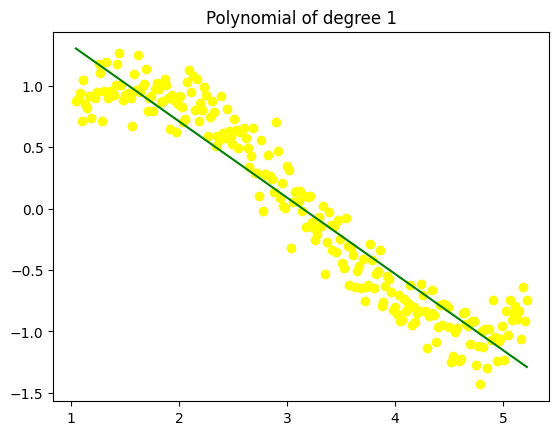

SSE for degree 3 is 0.021906075401791007
Coefficients for degree 3 are [ 0.          2.80376605 -1.18573504  0.1248226 ]


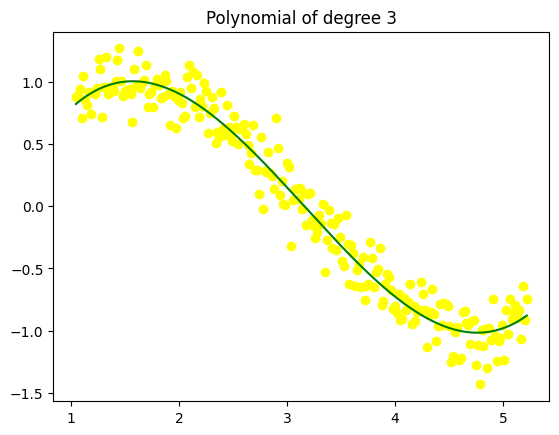

SSE for degree 6 is 0.021512988432006774
Coefficients for degree 6 are [ 0.         -8.89815647 10.05377173 -5.34486863  1.42997693 -0.19129888
  0.01027198]


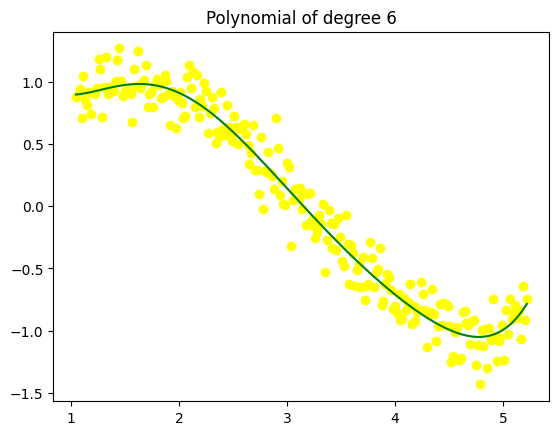

SSE for degree 9 is 0.02127428690419746
Coefficients for degree 9 are [ 0.00000000e+00  4.21102548e+01 -5.42077518e+01  3.82100805e+01
 -1.59317970e+01  3.95978155e+00 -5.62367892e-01  3.92210292e-02
 -5.88759713e-04 -4.29544728e-05]


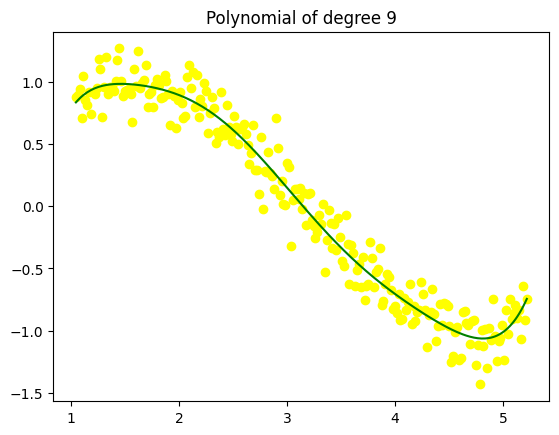

SSE for degree 12 is 0.020843744514163716
Coefficients for degree 12 are [ 0.00000000e+00 -4.82089143e+03  1.03454408e+04 -1.29810086e+04
  1.06168796e+04 -5.96899532e+03  2.36806843e+03 -6.68714770e+02
  1.33538968e+02 -1.84067914e+01  1.66335089e+00 -8.85046439e-02
  2.09671241e-03]


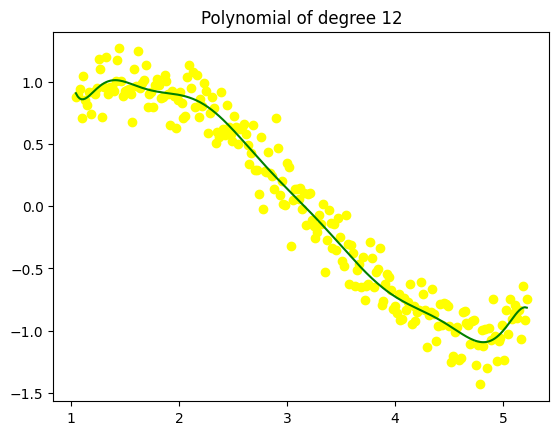

SSE for degree 15 is 0.020850530705358347
Coefficients for degree 15 are [ 0.00000000e+00 -7.26583492e+02  7.16694084e+02  1.24337274e+02
 -6.64571243e+02  2.04900463e+02  4.93443181e+02 -6.67412813e+02
  4.30839008e+02 -1.76003207e+02  4.90041617e+01 -9.48111464e+00
  1.26003575e+00 -1.10046894e-01  5.69980624e-03 -1.32876114e-04]


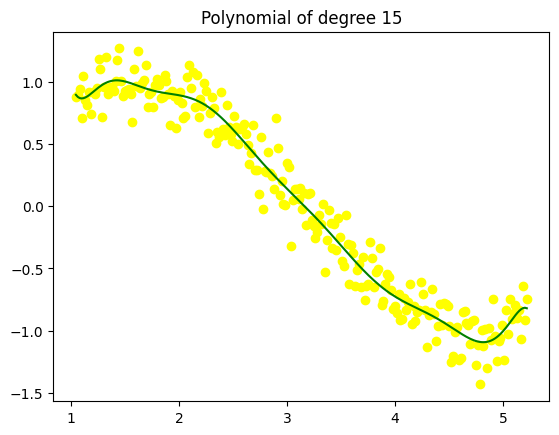

In [7]:
# 4. Plot the created models for the power of 1, 3,6,9,12 and 15, and print the SSE, Coefficients for the plotted models.
from sklearn.linear_model import LinearRegression
degree = [1, 3, 6, 9, 12, 15]
for i in degree:
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    regressor = LinearRegression()
    regressor.fit(X_poly, Y)
    y_pred = regressor.predict(X_poly)
    print("SSE for degree", i,
          "is", mean_squared_error(Y, y_pred))
    print("Coefficients for degree", i, "are", regressor.coef_)
    plt.scatter(X, Y, color='yellow')
    plt.plot(X, y_pred, color='green')
    plt.title("Polynomial of degree " + str(i))
    plt.show()

In [8]:

# 5. Add the L1 and L2 regularization to the nonlinear regression model with 15th degree polynomial created in Step 3.
# Lasso (L1) and Ridge (L2)

def lasso_regression(X, Y, rate, iter, deg, l):
    # Initialize the parameters
    n = len(X)
    t = np.zeros((deg + 1, 1))
    # Performing Gradient Descent
    for i in range(iter):
        Y_pred = np.zeros((n, 1))
        for j in range(deg + 1):
            Y_pred += t[j] * (X ** j)
        D_theta = np.zeros((deg + 1, 1))
        for j in range(deg + 1):
            D_theta[j] = (-2 / n) * sum((Y - Y_pred) * (X ** j))
        t = t - rate * D_theta
        for j in range(deg + 1):
            if t[j] > 0:
                t[j] -= l
            elif t[j] < 0:
                t[j] += l
            else:
                t[j] = 0
    return t

In [9]:
# L2 (Ridge)
from tokenize import tabsize


def ridge_regression(X, Y, rate, iter, deg, l):
    # Initialize the parameters
    n = len(X)
    t = np.zeros((deg + 1, 1))
    # Performing Gradient Descent
    for i in range(iter):
        Y_pred = np.zeros((n, 1))
        for j in range(deg + 1):
            Y_pred += t[j] * (X ** j)
        D_theta = np.zeros((deg + 1, 1))
        for j in range(deg + 1):
            D_theta[j] = (-2 / n) * sum((Y - Y_pred) * (X ** j))
        t = t - rate * D_theta
        for j in range(deg + 1):
            t[j] -= l * t[j]
    return tabsize

In [10]:
def plot_model(X, Y, rate, iter, deg):
    # Linear Regression
    if deg == 1:
        m, c = linear_regression(X, Y, rate, iter)
        Y_pred = m * X + c
    # Non-Linear Regression
    else:
        t = non_linear_regression(X, Y, rate, iter, deg)
        Y_pred = np.zeros((len(X), 1))
        for i in range(deg + 1):
            Y_pred += t[i] * (X ** i)

In [11]:
def plot_regularized_model(X, Y, rate, iter, deg, l):
    # Lasso Regression
    if l == 1:
        t = lasso_regression(X, Y, rate, iter, deg, l)
        Y_pred = np.zeros((len(X), 1))
        for i in range(deg + 1):
            Y_pred += t[i] * (X ** i)
    # Ridge Regression
    else:
        t = ridge_regression(X, Y, rate, iter, deg, l)
        Y_pred = np.zeros((len(X), 1))
        for i in range(deg + 1):
            Y_pred += t[i] * (X ** i)

SSE for Lasso with lambda value  1e-10 is 0.027170524481589867
Coefficients for Lasso with lambda value 1e-10 are [ 0.00000000e+00  7.45183725e-03 -9.71130083e-02 -8.11119410e-03
 -4.17074744e-04  2.87164749e-05  1.39811688e-05  3.06987205e-06
  5.54298811e-07  9.18397518e-08  1.45493544e-08  2.24932733e-09
  3.43517825e-10  5.22644351e-11  7.97450364e-12  1.22707339e-12]


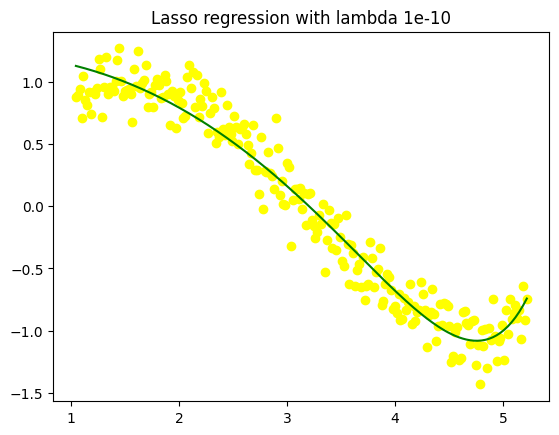

SSE for Lasso with lambda value  1e-08 is 0.027170522573995118
Coefficients for Lasso with lambda value 1e-08 are [ 0.00000000e+00  7.45207332e-03 -9.71130656e-02 -8.11119325e-03
 -4.17074422e-04  2.87165175e-05  1.39811738e-05  3.06987253e-06
  5.54298845e-07  9.18397517e-08  1.45493536e-08  2.24932709e-09
  3.43517770e-10  5.22644239e-11  7.97450146e-12  1.22707298e-12]


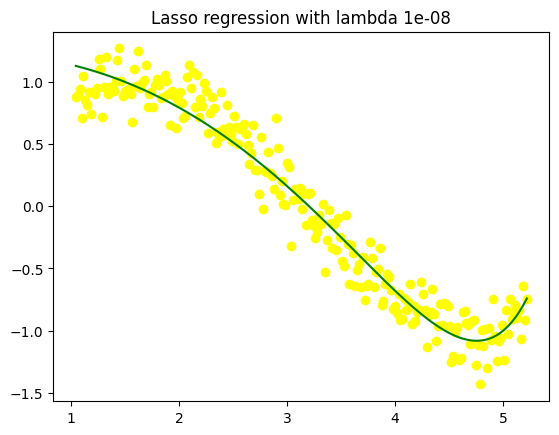

SSE for Lasso with lambda value  0.0001 is 0.02715220800928373
Coefficients for Lasso with lambda value 0.0001 are [ 0.00000000e+00  9.73091730e-03 -9.76718064e-02 -8.10286811e-03
 -4.13858683e-04  2.91417588e-05  1.40313528e-05  3.07466421e-06
  5.54634162e-07  9.18365478e-08  1.45410373e-08  2.24688404e-09
  3.42962491e-10  5.21504653e-11  7.95231644e-12  1.22288564e-12]


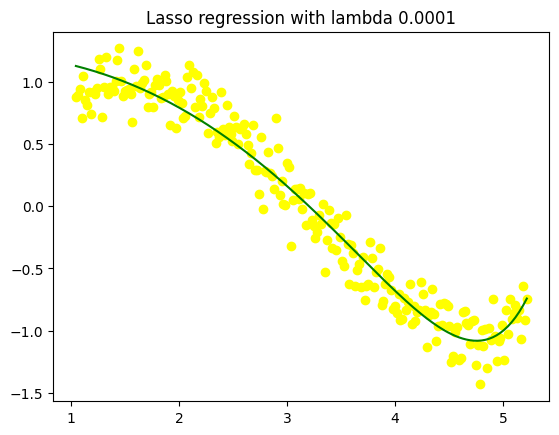

SSE for Lasso with lambda value  0.01 is 0.027207845185529753
Coefficients for Lasso with lambda value 0.01 are [ 0.00000000e+00  0.00000000e+00 -9.48450506e-02 -9.17576737e-03
 -3.32305192e-04  4.29818229e-05  1.60218440e-05  3.22546993e-06
  5.59166023e-07  9.01002258e-08  1.39397729e-08  2.10657628e-09
  3.14291777e-10  4.66574321e-11  6.93774055e-12  1.03970577e-12]


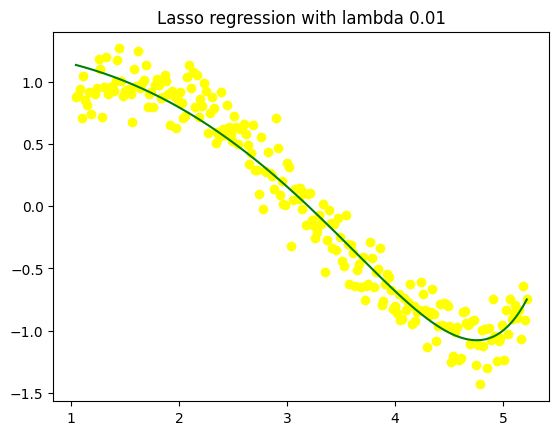

SSE for Lasso with lambda value  1 is 0.029594546184436205
Coefficients for Lasso with lambda value 1 are [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -9.99844073e-03
 -6.39325400e-03 -0.00000000e+00  7.74631399e-05  1.09390139e-05
  1.41861004e-06  1.81059893e-07  2.19182102e-08  2.39556427e-09
  2.06497401e-10  4.68138850e-12 -3.84520644e-12 -1.36804848e-12]


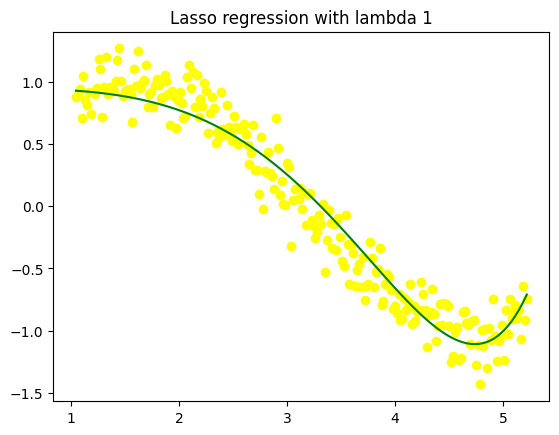

SSE for Lasso with lambda value  10 is 0.05062903872323507
Coefficients for Lasso with lambda value 10 are [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -2.03474246e-03 -2.54430684e-06  1.89109402e-05
  3.45391949e-06  4.33086431e-07  5.36686982e-08  6.21893942e-09
  6.16622301e-10  3.66910358e-11 -4.45307377e-12 -2.45814397e-12]


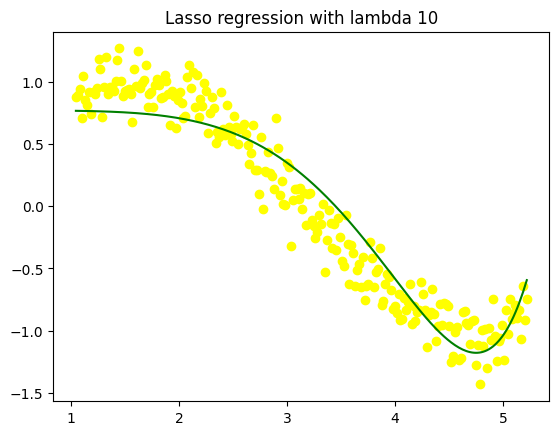

SSE for Lasso with lambda value  20 is 0.056315395803837195
Coefficients for Lasso with lambda value 20 are [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.51159271e-03 -1.13624091e-04  1.11726054e-05
  4.24048229e-06  5.19277893e-07  6.45333816e-08  7.61582025e-09
  7.88327886e-10  5.55169522e-11 -2.93592186e-12 -2.47844155e-12]


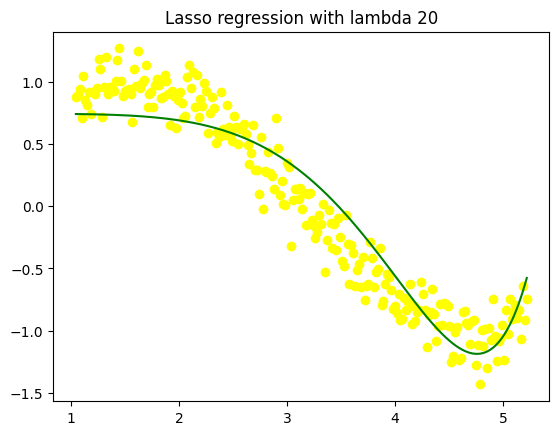

In [12]:
# (Optimize for Max. of 100 Iterations and lambda values [1e-10,1e-8,1e-4,1e-2,1,10,20])
# 6. Plot the Lasso (L1) and Ridge (L2) regression models for lambda values [1e-10,1e-8,1e-4,1e-2,1,10,20],
# and print the SSE, Coefficients for the plotted models.
from sklearn.linear_model import Ridge, Lasso
poly = PolynomialFeatures(degree=15)
X_poly = poly.fit_transform(X.reshape(-1, 1))
# Lambda_Values taken are.
lambda_values = [1e-10, 1e-8, 1e-4, 1e-2, 1, 10, 20]
for i in lambda_values:
    lasso_regressor = Lasso(alpha=i, max_iter=100)
    lasso_regressor.fit(X_poly, Y)
    y_pred = lasso_regressor.predict(X_poly)
    print("SSE for Lasso with lambda value ", i, "is",
          mean_squared_error(Y, y_pred))
    print("Coefficients for Lasso with lambda value",
          i, "are", lasso_regressor.coef_)
    plt.scatter(X, Y, color='yellow')
    plt.plot(X, y_pred, color='green')
    plt.title("Lasso regression with lambda " + str(i))
    plt.show()


SSE for Ridge with lambda value 1e-10 is 0.02084842964136545
Coefficients for Ridge with lambda value 1e-10 are [ 0.00000000e+00 -1.12712278e+03  1.48977655e+03 -5.52046458e+02
 -6.59592221e+02  8.66918097e+02 -3.33553037e+02 -8.47124209e+01
  1.53426207e+02 -8.17659398e+01  2.57799415e+01 -5.34734386e+00
  7.41216314e-01 -6.64484893e-02  3.49703935e-03 -8.22709538e-05]


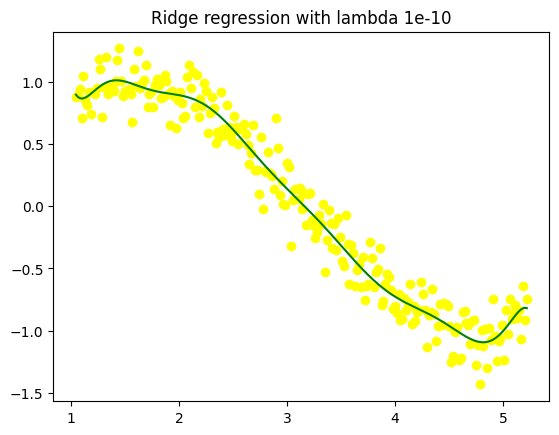

SSE for Ridge with lambda value 1e-08 is 0.02087297437271763
Coefficients for Ridge with lambda value 1e-08 are [ 0.00000000e+00 -3.12297489e+02  2.86174731e+02  6.92522470e+01
 -2.54911155e+02  5.21719755e+01  1.87416968e+02 -2.13171974e+02
  1.17717705e+02 -3.99484643e+01  8.74119708e+00 -1.20222052e+00
  9.08472687e-02 -1.57807629e-03 -2.63634800e-04  1.45273851e-05]


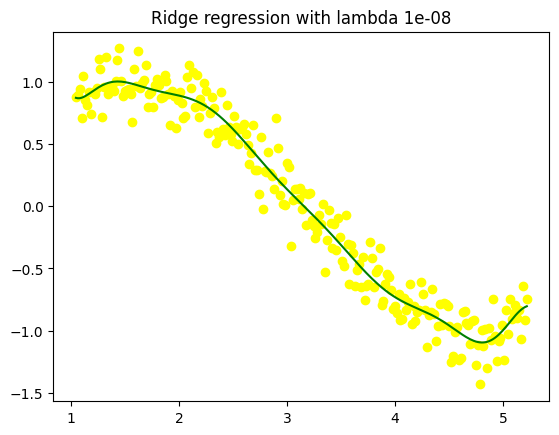

SSE for Ridge with lambda value 0.0001 is 0.021008613028728695
Coefficients for Ridge with lambda value 0.0001 are [ 0.00000000e+00  3.31735934e+00  2.70126569e+00 -8.52194015e-01
 -3.04875940e+00 -6.20643143e-01  2.93805944e+00  5.42785304e-01
 -3.32046851e+00  2.70702261e+00 -1.15562997e+00  3.02743904e-01
 -5.04005422e-02  5.20836207e-03 -3.04589951e-04  7.68470286e-06]


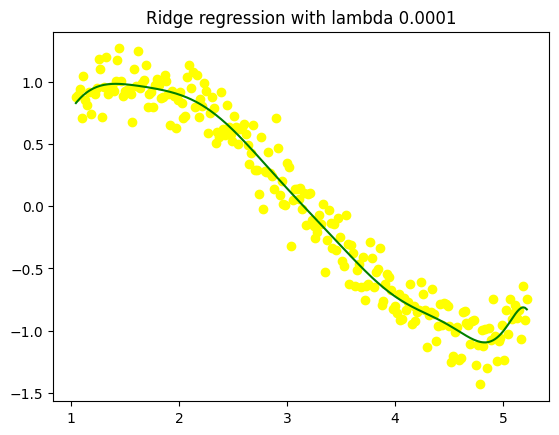

SSE for Ridge with lambda value 0.01 is 0.021104997850713923
Coefficients for Ridge with lambda value 0.01 are [ 0.00000000e+00  3.96750689e-01  4.22315870e-01  1.35529871e-01
 -2.05676823e-01 -2.70830105e-01  1.73317583e-02  2.53591420e-01
  4.71539369e-03 -2.41554228e-01  1.97995073e-01 -7.96107538e-02
  1.87133169e-02 -2.62267224e-03  2.03913047e-04 -6.79148736e-06]


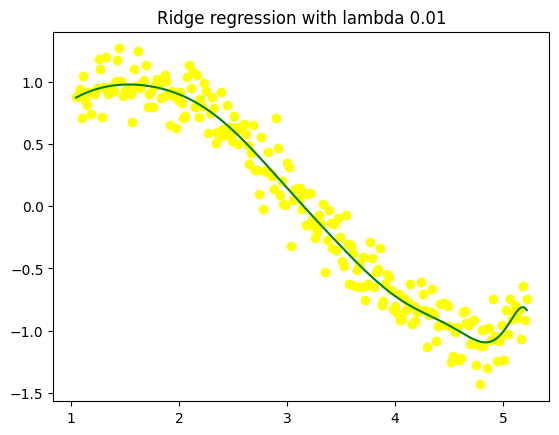

SSE for Ridge with lambda value 1 is 0.021202908267547442
Coefficients for Ridge with lambda value 1 are [ 0.00000000e+00  1.77344058e-02  2.46464412e-02  1.79862165e-02
  2.16716665e-03 -8.95579620e-03  1.59299593e-04  1.94262669e-02
  7.69336353e-03 -5.35746309e-02  5.22169272e-02 -2.45717719e-02
  6.57460149e-03 -1.02504156e-03  8.70815230e-05 -3.12483216e-06]


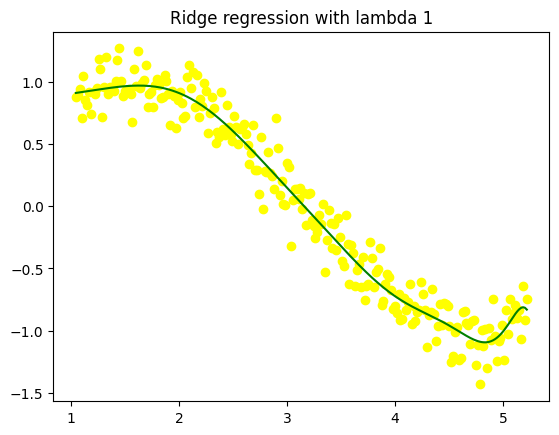

SSE for Ridge with lambda value 10 is 0.02120818994576168
Coefficients for Ridge with lambda value 10 are [ 0.00000000e+00  3.92112396e-03  7.93840029e-03  1.14248645e-02
  1.32795433e-02  1.17966966e-02  5.30333940e-03 -5.20808286e-03
 -1.14711921e-02 -1.92519622e-03  1.34605439e-02 -9.14825908e-03
  2.92532943e-03 -5.08267418e-04  4.64899196e-05 -1.76101611e-06]


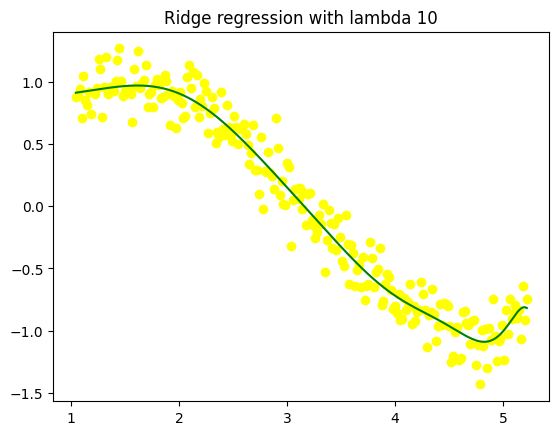

SSE for Ridge with lambda value 20 is 0.02122908777051835
Coefficients for Ridge with lambda value 20 are [ 0.00000000e+00  3.44261960e-03  7.40587019e-03  1.11456974e-02
  1.31032714e-02  1.10049255e-02  3.36007548e-03 -6.88525317e-03
 -9.60634999e-03  1.99472656e-03  7.88804962e-03 -6.13953954e-03
  2.05686944e-03 -3.66094843e-04  3.39962132e-05 -1.30162149e-06]


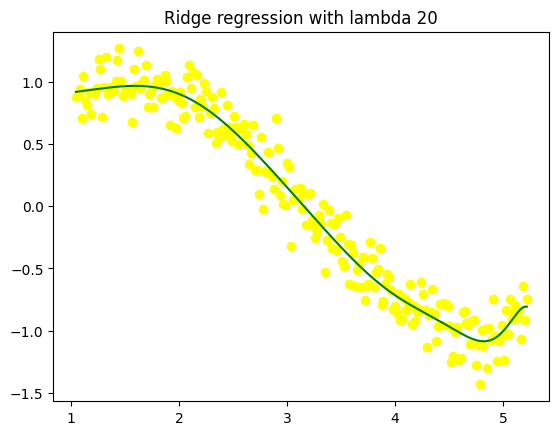

In [13]:

for i in lambda_values:
    ridge_regressor = Ridge(alpha=i, max_iter=100)
    ridge_regressor.fit(X_poly, Y)
    y_pred = ridge_regressor.predict(X_poly)
    print("SSE for Ridge with lambda value", i, "is",
          mean_squared_error(Y, y_pred))
    print("Coefficients for Ridge with lambda value",
          i, "are", ridge_regressor.coef_)
    plt.scatter(X, Y, color='yellow')
    plt.plot(X, y_pred, color='green')
    plt.title("Ridge regression with lambda " + str(i))
    plt.show()